In [1]:
#1
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize
# Open the corpus text file.
with open("/Users/eli/Documents/433/hw10f.txt", "r") as f:
    corpus = f.read()

# Tokenize the corpus into sentences.
sentences = sent_tokenize(corpus)

# Count the total number of sentences.
total_sentences = len(sentences)

# Print the total number of sentences.
print("Total number of sentence tokens in the corpus:", total_sentences) 

Total number of sentence tokens in the corpus: 23


In [2]:
#2
# Tokenize the text into words
words = nltk.word_tokenize(corpus)
# Tag the words to identify noun phrases
word_tags = nltk.pos_tag(words)
noun_phrases = [word for word, pos in word_tags if pos.startswith("NN")]
print("Noun phrases discussed in the corpus:", noun_phrases)


Noun phrases discussed in the corpus: ['George', 'Mason', 'campus', 'space', 'people', 'races', 'George', 'Mason', 'school', 'teachers', 'students', 'area', 'students', 'opportunities', 'school', 'school', 'George', 'Mason', 'professors', 'COVID', 'campus', 'times', 'lot', 'amenities', 'students', 'college', 'others', 'campus', 'emails', 'scholarships', 'internship', 'opportunities', 'school', 'anyone', 'things', 'activities', 'atmosphere', 'George', 'Mason', 'Patriot', 'commuter', 'college', 'college', 'experience', 'feel', 'college', 'classes', 'online', 'courses', 'bit', 'adjustment', 'person', 'time', 'online', 'courses', 'pandemic', 'difficulties', 'help', 'assignments', 'projects', 'resources', 'courses', 'note', 'school', 'people', 'aid', 'people', 'departments', 'amounts', 'money', 'THIS', 'PANDEMIC', 'PAPERWORK', 'classes', 'school']


In [3]:
#3

# a. Total words
total_words = len(words)
print("Total words:", total_words)

# b. Total stop words
stop_words = set(stopwords.words("english"))
total_stop_words = len([word for word in words if word.lower() in stop_words])
print("Total stop words:", total_stop_words)

# c. Total non-stop words
total_non_stop_words = total_words - total_stop_words
print("Total non-stop words:", total_non_stop_words)

Total words: 407
Total stop words: 193
Total non-stop words: 214


In [4]:
# 4. Sentiment Analysis
# Calculate the overall sentiment of the corpus
corpus_sentiment = TextBlob(corpus)
# a. Overall subjectivity score
subjectivity_score = corpus_sentiment.sentiment.subjectivity
# b. Overall polarity score
polarity_score = corpus_sentiment.sentiment.polarity

# Explanation
#subjectivity_explanation = "Subjectivity measures the extent to which text is subjective (0.0 = objective, 1.0 = subjective)."
#polarity_explanation = "Polarity measures the sentiment (positive: >0, neutral: 0, negative: <0) of the text."

In [5]:
#5
# Explanation for sentiment scores
subjectivity_explanation = "Subjectivity measures the extent to which text is subjective (0.0 = objective, 1.0 = subjective)."
polarity_explanation = "Polarity measures the sentiment (positive: >0, neutral: 0, negative: <0) of the text."

print("a. Overall subjectivity score:", subjectivity_score)
print("b. Overall polarity score:", polarity_score)
print(subjectivity_explanation)
print(polarity_explanation)

a. Overall subjectivity score: 0.5244604582409461
b. Overall polarity score: 0.3152060236511456
Subjectivity measures the extent to which text is subjective (0.0 = objective, 1.0 = subjective).
Polarity measures the sentiment (positive: >0, neutral: 0, negative: <0) of the text.


In [6]:
# 6. Use a for statement to iterate on each sentence in the corpus to determine its sentiment score
# and store them in a variable.
sentence_sentiments = []
for sentence in sentences:
    sentence_sentiment = TextBlob(sentence).sentiment.subjectivity
    sentence_sentiments.append(sentence_sentiment)

# Display the first five subjectivity scores
print("First five subjectivity scores:", sentence_sentiments[:5])

First five subjectivity scores: [0.25, 0.44999999999999996, 0.375, 0.5, 0.5]


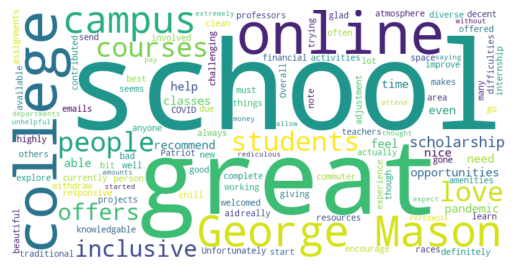

In [7]:
# 7. Data Visualization: Develop a word cloud using the text data.
# Set random_state to 433 and background_color to white
wordcloud = WordCloud(width=800, height=400, background_color="white", random_state=433).generate(corpus)
# Remove x-axis and y-axis ticks
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [8]:
# 8. Create a bar chart showing the 5 most frequently used words in the corpus (excluding stopwords).
# Calculate word frequencies
word_frequencies = nltk.FreqDist([word.lower() for word in words if word.isalpha() and word.lower() not in stop_words])
# Get the 5 most common words
most_common_words = word_frequencies.most_common(5)

In [9]:
# Extract words and frequencies for the chart
words_chart = [word for word, freq in most_common_words]
frequencies_chart = [freq for word, freq in most_common_words]


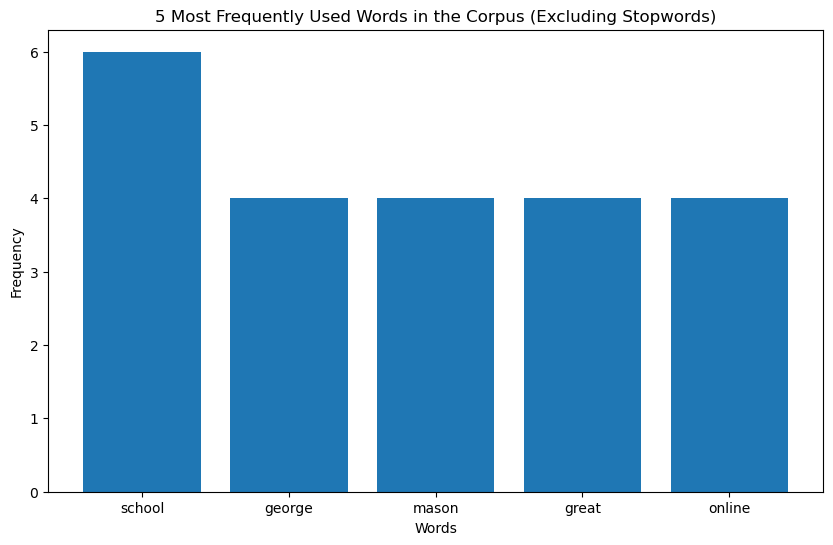

In [10]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words_chart, frequencies_chart)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("5 Most Frequently Used Words in the Corpus (Excluding Stopwords)")
plt.show()